# Bank Loan Term Prediction
---

## Import packages & read data.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.model_selection import train_test_split


In [2]:
df1 = pd.read_csv('credit_test.csv')
df2 = pd.read_csv('credit_train.csv')
df= pd.concat([df1,df2], axis=0, ignore_index=True)   # concat two dataset
df

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0,NaN
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0,NaN
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,NaN
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,NaN
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(110867, 19)

In [4]:
df.tail(100)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
110767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.isna().sum()

Loan_ID                           867
Customer_ID                       867
Current_Loan_Amount               867
Term                              867
Credit_Score                    22002
Annual_Income                   22002
Years_in_current_job             5516
Home_Ownership                    867
Purpose                           867
Monthly_Debt                      867
Years_of_Credit_History           867
Months_since_last_delinquent    59314
Number_of_Open_Accounts           867
Number_of_Credit_Problems         867
Current_Credit_Balance            867
Maximum_Open_Credit               869
Bankruptcies                     1093
Tax_Liens                         878
Loan_Status                     10867
dtype: int64

In [29]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110867 entries, 0 to 110866
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan_ID                       110000 non-null  object 
 1   Customer_ID                   110000 non-null  object 
 2   Current_Loan_Amount           110000 non-null  float64
 3   Term                          110000 non-null  object 
 4   Credit_Score                  88865 non-null   float64
 5   Annual_Income                 88865 non-null   float64
 6   Years_in_current_job          105351 non-null  object 
 7   Home_Ownership                110000 non-null  object 
 8   Purpose                       110000 non-null  object 
 9   Monthly_Debt                  110000 non-null  float64
 10  Years_of_Credit_History       110000 non-null  float64
 11  Months_since_last_delinquent  51553 non-null   float64
 12  Number_of_Open_Accounts       110000 non-nul

In [30]:
#duplicate = df1.duplicated()
#print(f'Duplicate in df1 :', duplicate.sum())
#duplicate = df2.duplicated()
#print(f'Duplicate in df2 :', duplicate.sum())
duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 11081


**Rename columns for easer code writing**

In [31]:
df.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Loan_Status'],
      dtype='object')

In [32]:
df.columns = df.columns.str.replace(' ','_')

In [33]:
df.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Loan_Status'],
      dtype='object')

## Split the data for train, validation and test

In [34]:
# split the data for train and test
df_Train, df_test = train_test_split(df, test_size = 0.2, random_state = 30 )

# split the train for train and val
df_train, df_val = train_test_split(df_Train, test_size = 0.2, random_state = 30 )

In [35]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (70954, 19)
Shape of validation: (17739, 19)
Shape of test: (22174, 19)


## Data Pre-processing

### Cleaning data

In [36]:
# reset index for train
df_train = df_train.reset_index(drop=True)

# reset index for val
df_val = df_val.reset_index(drop=True)

# reset index for val
df_test = df_test.reset_index(drop=True)

In [37]:
# dope nulls in Loan_ID & Loan_Status

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])
# df_train = df_train.dropna(subset = ['Loan_Status'])

# for val
df_val = df_val.dropna(subset = ['Loan_ID'])
# df_val = df_val.dropna(subset = ['Loan_Status'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])
# df_test = df_test.dropna(subset = ['Loan_Status'])

In [38]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (70385, 19)
Shape of validation: (17598, 19)
Shape of test: (22017, 19)


In [39]:
df_train.sample(20)

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
59771,a571f039-8cbf-4776-8c70-d38560d4022b,eb6187a6-6033-412c-903f-70d0bf6aa887,430672.0,Short Term,735.0,1078630.0,10+ years,Own Home,Home Improvements,14921.08,11.6,36.0,13.0,0.0,220020.0,562386.0,0.0,0.0,Fully Paid
18893,afbc67b3-ec8d-4856-8254-8745469fdf97,2a9bc13b-2638-426b-8e02-ede5e2774c5d,59620.0,Short Term,700.0,1202149.0,NaN,Home Mortgage,other,23141.24,22.6,11.0,6.0,0.0,387676.0,468072.0,0.0,0.0,Charged Off
24267,72374f59-ab97-42dd-b6ce-365ac9fb2240,cf66a6c8-519e-4937-8153-03b36203c2ef,201256.0,Short Term,7370.0,1931160.0,3 years,Rent,Debt Consolidation,37657.62,10.8,NaN,10.0,0.0,618678.0,910272.0,0.0,0.0,Charged Off
38739,f5e8e902-01b1-4e9d-af4a-10c512d4315f,ec2132d0-c5a0-4bd5-aab9-4e1bd7f84ed8,689084.0,Short Term,707.0,1190996.0,NaN,Home Mortgage,Home Improvements,16673.83,22.0,NaN,10.0,0.0,163191.0,1369280.0,0.0,0.0,Fully Paid
55244,e2eed192-bf8b-48b5-b0b3-690067a5423d,4dd2eac7-8950-434d-a2b6-4a14289b198f,105138.0,Short Term,695.0,573420.0,4 years,Rent,Buy a Car,9365.86,13.3,NaN,8.0,0.0,70908.0,139414.0,0.0,0.0,Fully Paid
44750,068759c3-f658-47a6-926a-4a2cd8e7d277,5718340d-4be9-4d83-8d47-5097febaef42,716540.0,Short Term,711.0,1411681.0,6 years,Home Mortgage,Debt Consolidation,33645.20,18.3,13.0,13.0,1.0,140448.0,674806.0,0.0,1.0,Fully Paid
4462,03d44d6b-e583-48d7-8a2b-5dea8f72977b,59bf5203-2663-4eac-b8e9-b2a01edf38df,260920.0,Long Term,719.0,1117276.0,NaN,Rent,Debt Consolidation,15176.25,40.8,NaN,6.0,1.0,125666.0,179630.0,1.0,0.0,Fully Paid
4661,95823ea1-3cdb-410b-9b55-1b4cb2239c09,85c1c6c0-61f0-461e-b858-cc2941a8a330,755986.0,Long Term,684.0,2159768.0,8 years,Home Mortgage,Debt Consolidation,19437.95,22.7,NaN,8.0,0.0,379867.0,507342.0,0.0,0.0,Fully Paid
29430,1b231936-372b-4963-8687-0d7528faa30e,b60b8889-f441-417b-b0d8-3a6c6afe6239,473000.0,Short Term,749.0,1154687.0,10+ years,Home Mortgage,Home Improvements,1462.62,23.3,NaN,8.0,0.0,48279.0,963842.0,0.0,0.0,Fully Paid
47102,da354fe3-bac7-4072-9a59-57b423ea3ea7,d5155610-4b14-409d-a690-ce072b513783,759682.0,Long Term,674.0,2624356.0,1 year,Home Mortgage,Debt Consolidation,44832.78,12.4,62.0,16.0,0.0,493525.0,681934.0,0.0,0.0,Charged Off


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70385 entries, 0 to 70953
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       70385 non-null  object 
 1   Customer_ID                   70385 non-null  object 
 2   Current_Loan_Amount           70385 non-null  float64
 3   Term                          70385 non-null  object 
 4   Credit_Score                  56818 non-null  float64
 5   Annual_Income                 56818 non-null  float64
 6   Years_in_current_job          67391 non-null  object 
 7   Home_Ownership                70385 non-null  object 
 8   Purpose                       70385 non-null  object 
 9   Monthly_Debt                  70385 non-null  float64
 10  Years_of_Credit_History       70385 non-null  float64
 11  Months_since_last_delinquent  32820 non-null  float64
 12  Number_of_Open_Accounts       70385 non-null  float64
 13  N

In [41]:
df_train.isna().sum()

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    13567
Annual_Income                   13567
Years_in_current_job             2994
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    37565
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      145
Tax_Liens                           6
Loan_Status                      6383
dtype: int64

In [42]:
df_val.isna().sum()

Loan_ID                            0
Customer_ID                        0
Current_Loan_Amount                0
Term                               0
Credit_Score                    3359
Annual_Income                   3359
Years_in_current_job             745
Home_Ownership                     0
Purpose                            0
Monthly_Debt                       0
Years_of_Credit_History            0
Months_since_last_delinquent    9249
Number_of_Open_Accounts            0
Number_of_Credit_Problems          0
Current_Credit_Balance             0
Maximum_Open_Credit                0
Bankruptcies                      39
Tax_Liens                          3
Loan_Status                     1591
dtype: int64

In [43]:
df_test.isna().sum()

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                     4209
Annual_Income                    4209
Years_in_current_job              910
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    11633
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                       42
Tax_Liens                           2
Loan_Status                      2026
dtype: int64

In [44]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())

Duplicate in train : 4090
Duplicate in validation : 262
Duplicate in test : 403


In [45]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_val.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in taes:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 8765
The duplicate in Customer ID in train: 8765
The duplicate in Loan ID in val: 565
The duplicate in Customer ID in train: 565
The duplicate in Loan ID in taes: 845
The duplicate in Customer ID in train: 845


In [46]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

a6409ec7-c625-47d6-ab89-abea2cc6ed83    2
bb9fc2e7-b207-440d-9a0d-7f48133a1d38    2
fcc9afdf-258d-430b-99a6-24f22dce66c6    2
407c0db3-8277-485e-949a-9f9f61b4e53c    2
7d8aad0b-ba11-47e7-92f6-e2e01052e0c5    2
                                       ..
fb722d1d-f77f-4459-8473-5ac9231dde40    1
ce78ff37-addc-4cf8-9b01-475981e2b257    1
0c209d27-cac5-4449-a692-e403778f58d6    1
dd91ad54-e3d5-43b2-9aea-acbe164d5774    1
bdd4c5f6-682f-4eab-8bd0-de39ac106ff2    1
Name: Loan_ID, Length: 61620, dtype: int64

In [47]:
df_train['Loan_ID'].nunique()

61620

In [48]:
df_train[df_train['Loan_Status'].isna()]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
6,feb282bb-3fad-46b7-b0f8-ef6026202d08,ca6e1c04-3cab-42ac-9e80-d87fb405abcc,472076.0,Long Term,704.0,1237508.0,2 years,Home Mortgage,Debt Consolidation,23997.38,20.3,NaN,15.0,0.0,621015.0,1491864.0,0.0,0.0,NaN
7,2bb59b6c-bb9a-4d4e-b401-519d2cdb5c1f,5df1d5e0-a93a-4997-aa52-45b293c32ba8,66088.0,Short Term,711.0,3233876.0,6 years,Own Home,other,24038.61,18.0,10.0,6.0,0.0,1365986.0,1717342.0,0.0,0.0,NaN
29,96221533-e640-4d07-8967-159ee2d4e2bc,6b16e5ef-88be-46ac-b9ed-f53c59cb50e9,133474.0,Short Term,725.0,671783.0,6 years,Own Home,Debt Consolidation,10860.40,10.9,9.0,9.0,0.0,62890.0,131186.0,0.0,0.0,NaN
31,f122a8e3-6504-4808-84f7-6dd5115dceb1,91378b9c-ca3a-4c12-a0dc-1394d30be104,246620.0,Long Term,709.0,950855.0,10+ years,Rent,Debt Consolidation,12994.86,32.2,NaN,9.0,0.0,202559.0,264110.0,0.0,0.0,NaN
36,fd4ab500-e940-4033-9bd8-9f790ced79ab,ec53ade5-c44b-4c79-8d4d-188d4df9201a,133870.0,Short Term,7360.0,481745.0,3 years,Rent,Debt Consolidation,10196.92,8.0,NaN,11.0,0.0,82023.0,131560.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70901,d8ad20fc-e55d-4100-a171-1280d9686941,17c16b3f-bf31-424e-a130-da6e3c388509,99999999.0,Short Term,749.0,952755.0,10+ years,Home Mortgage,Debt Consolidation,7606.27,36.5,NaN,9.0,0.0,324767.0,1387650.0,0.0,0.0,NaN
70907,3a2d6cfe-40db-478f-8e77-5a4eb69d96ed,20c61634-3714-4e73-8443-54e0ddb9f0b4,431376.0,Short Term,747.0,829977.0,NaN,Home Mortgage,Debt Consolidation,13556.50,19.9,NaN,6.0,0.0,443897.0,917796.0,0.0,0.0,NaN
70909,148df809-9ea8-4558-a641-e50b60f63238,9e7211a2-db24-4aaf-957f-e9c0f2815553,216986.0,Short Term,NaN,NaN,1 year,Rent,Debt Consolidation,14412.83,19.8,74.0,9.0,0.0,171266.0,221342.0,0.0,0.0,NaN
70911,50d15d17-e179-47b6-932c-e251492b7db5,bccfa73a-31a2-4972-b8aa-073c0a52b576,110330.0,Short Term,717.0,685976.0,10+ years,Home Mortgage,Debt Consolidation,10003.88,36.5,56.0,11.0,0.0,167656.0,510840.0,0.0,0.0,NaN


In [49]:
df_train[df_train['Loan_ID'] == '53bf4fc0-8951-4329-9965-a81a852df395']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
68694,53bf4fc0-8951-4329-9965-a81a852df395,0d58dc49-dd92-4887-8117-0094d2e8ea56,62304.0,Short Term,722.0,999172.0,10+ years,Rent,Debt Consolidation,8184.82,18.7,9.0,4.0,1.0,46474.0,79134.0,1.0,0.0,NaN


**The reasone for the repetition becouse the loan status has been changed from charged off to fully paid.**
Dropping the duplicat loan id and keeping only the fully paid loans.

In [50]:
df_train['Loan_Status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [51]:
df_train['Loan_Status'].isna().sum()

6383

In [52]:
df_train = df_train[~((df_train.Loan_ID.duplicated())
                      & (df_train['Loan_Status'] != 'Fully Paid' ) 
                      & (df_train['Loan_Status'] != 'Charged Off' ))]
df_val = df_val[~((df_val.Loan_ID.duplicated())
                  & (df_val['Loan_Status'] != 'Fully Paid' ) 
                  & (df_val['Loan_Status'] != 'Charged Off' ))]
df_test = df_test[~((df_test.Loan_ID.duplicated()) 
                    & (df_test['Loan_Status'] != 'Fully Paid' )
                    & (df_test['Loan_Status'] != 'Charged Off' ))]

In [53]:
df_train[df_train['Loan_ID'] == '53bf4fc0-8951-4329-9965-a81a852df395']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
68694,53bf4fc0-8951-4329-9965-a81a852df395,0d58dc49-dd92-4887-8117-0094d2e8ea56,62304.0,Short Term,722.0,999172.0,10+ years,Rent,Debt Consolidation,8184.82,18.7,9.0,4.0,1.0,46474.0,79134.0,1.0,0.0,NaN


In [54]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_val.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in taes:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 8041
The duplicate in Customer ID in train: 8041
The duplicate in Loan ID in val: 509
The duplicate in Customer ID in train: 509
The duplicate in Loan ID in taes: 774
The duplicate in Customer ID in train: 774


In [55]:
# dope nulls in Loan_ID & Loan_Status

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])
# df_train = df_train.dropna(subset = ['Loan_Status'])

# for val
df_val = df_val.dropna(subset = ['Loan_ID'])
# df_val = df_val.dropna(subset = ['Loan_Status'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])
# df_test = df_test.dropna(subset = ['Loan_Status'])

In [56]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (69661, 19)
Shape of validation: (17542, 19)
Shape of test: (21946, 19)


In [57]:
# check again for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())

Duplicate in train : 4090
Duplicate in validation : 262
Duplicate in test : 403


In [58]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    13481
Annual_Income                   13481
Years_in_current_job             2963
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    37204
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      142
Tax_Liens                           6
Loan_Status                      5659
dtype: int64

In [59]:
# drop nulls in Annual_Income

# for train
df_train = df_train[~df_train.Annual_Income.isna()]

# for val
df_val = df_val[~df_val.Annual_Income.isna()]

# for test
df_test = df_test[~df_test.Annual_Income.isna()]

In [60]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (56180, 19)
Shape of validation: (14197, 19)
Shape of test: (17743, 19)


In [61]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2381
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    29827
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      115
Tax_Liens                           4
Loan_Status                      4510
dtype: int64

In [62]:
df_train['Credit_Score'].nunique()

320

In [63]:
# # fill nulls in Credit_Score with median

# # for train
# median = df_train['Credit_Score'].median()
# df_train['Credit_Score'].fillna(median, inplace=True)

# # for val
# median = df_val['Credit_Score'].median()
# df_val['Credit_Score'].fillna(median, inplace=True)

# # for test
# median = df_test['Credit_Score'].median()
# df_test['Credit_Score'].fillna(median, inplace=True)



# # fill nulls in Annual_Income with median

# # for train
# median = df_train['Annual_Income'].median()
# df_train['Annual_Income'].fillna(median, inplace=True)

# # for val
# median = df_val['Annual_Income'].median()
# df_val['Annual_Income'].fillna(median, inplace=True)

# # for test
# median = df_test['Annual_Income'].median()
# df_test['Annual_Income'].fillna(median, inplace=True)

In [64]:
# fill nulls in Years_in_current_job & Months_since_last_delinquent

# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna(0)
df_train['Months_since_last_delinquent'] = df_train['Months_since_last_delinquent'].fillna(0)


# for val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].fillna(0)
df_val['Months_since_last_delinquent'] = df_val['Months_since_last_delinquent'].fillna(0)


# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna(0)
df_test['Months_since_last_delinquent'] = df_test['Months_since_last_delinquent'].fillna(0)

In [65]:
df_train.isnull().sum()

Loan_ID                            0
Customer_ID                        0
Current_Loan_Amount                0
Term                               0
Credit_Score                       0
Annual_Income                      0
Years_in_current_job               0
Home_Ownership                     0
Purpose                            0
Monthly_Debt                       0
Years_of_Credit_History            0
Months_since_last_delinquent       0
Number_of_Open_Accounts            0
Number_of_Credit_Problems          0
Current_Credit_Balance             0
Maximum_Open_Credit                1
Bankruptcies                     115
Tax_Liens                          4
Loan_Status                     4510
dtype: int64

In [66]:
# drop nulls 

# for train
df_train = df_train.dropna()

# for val
df_val = df_val.dropna()

# for test
df_test = df_test.dropna()

In [67]:
df_train.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
Loan_Status                     0
dtype: int64

In [68]:
df_train.duplicated().sum()

4084

In [69]:
df_train.drop_duplicates(keep=False, inplace=True)

In [70]:
df_train.duplicated().sum()

0

In [71]:
df_train.value_counts().sum()

43399

In [72]:
df_train.Years_in_current_job.value_counts()

10+ years    13495
2 years       4007
3 years       3552
< 1 year      3541
5 years       3006
1 year        2785
4 years       2597
6 years       2504
7 years       2373
8 years       1999
0             1842
9 years       1698
Name: Years_in_current_job, dtype: int64

In [73]:
# Convert the Years_in_current_job into INT

#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['10+ years'],"10 years");

#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['10+ years'],"10 years");

#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['10+ years'],"10 years");


In [75]:
#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['< 1 year'],"1 year");
#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['< 1 year'],"1 year");
#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['< 1 year'],"1 year");

In [76]:
#DF_TRAIN
df_train['Years_in_current_job'] = df_train.Years_in_current_job.str.strip('years')
#df_val
df_val['Years_in_current_job'] = df_val.Years_in_current_job.str.strip('years')
#df_test
df_test['Years_in_current_job'] = df_test.Years_in_current_job.str.strip('years')

In [77]:
df_train.Years_in_current_job.value_counts()

10     13495
1       6326
2       4007
3       3552
5       3006
4       2597
6       2504
7       2373
8       1999
9       1698
Name: Years_in_current_job, dtype: int64

In [78]:
df_train.Years_in_current_job.isna().sum()

1842

In [79]:
median = df_train['Years_in_current_job'].median()
df_train['Years_in_current_job'].fillna(median, inplace=True)

median = df_val['Years_in_current_job'].median()
df_val['Years_in_current_job'].fillna(median, inplace=True)


median = df_test['Years_in_current_job'].median()
df_test['Years_in_current_job'].fillna(median, inplace=True)


In [80]:
df_train['Years_in_current_job']= df_train['Years_in_current_job'].astype(int)
#df_val
df_val['Years_in_current_job']= df_val['Years_in_current_job'].astype(int)
#df_test
df_test['Years_in_current_job']= df_test['Years_in_current_job'].astype(int)

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43399 entries, 0 to 70953
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       43399 non-null  object 
 1   Customer_ID                   43399 non-null  object 
 2   Current_Loan_Amount           43399 non-null  float64
 3   Term                          43399 non-null  object 
 4   Credit_Score                  43399 non-null  float64
 5   Annual_Income                 43399 non-null  float64
 6   Years_in_current_job          43399 non-null  int32  
 7   Home_Ownership                43399 non-null  object 
 8   Purpose                       43399 non-null  object 
 9   Monthly_Debt                  43399 non-null  float64
 10  Years_of_Credit_History       43399 non-null  float64
 11  Months_since_last_delinquent  43399 non-null  float64
 12  Number_of_Open_Accounts       43399 non-null  float64
 13  N

# Visualize data
_ _ _

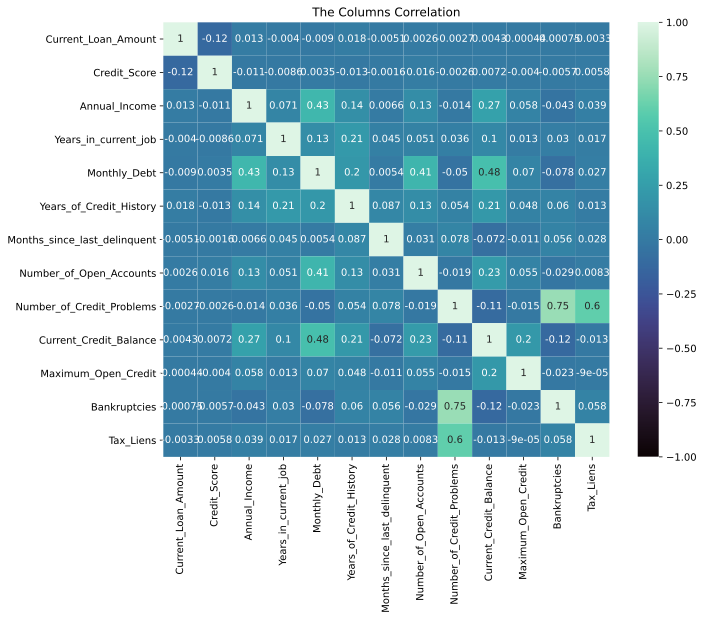

In [82]:
plt.figure(figsize=(10,8))
plt.title('The Columns Correlation')
sns.heatmap(df_train.corr(),cmap='mako', annot=True, vmin=-1, vmax=1);

# Feature Engneering

In [84]:
#Get Dummies

In [89]:
lone_train = df_train.select_dtypes(exclude=['object']).copy()
bank_lone1=df_train.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]

#For val
lone_val = df_val.select_dtypes(exclude=['object']).copy()
bank_lone2=df_val.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]

In [90]:
df_dum_lone_train = pd.get_dummies(bank_lone1, drop_first=True)

bank_lone_train = pd.concat([lone_train, df_dum_lone_train], axis=1)


#for val
df_dum_lone_val = pd.get_dummies(bank_lone2, drop_first=True)

bank_lone_val = pd.concat([lone_val, df_dum_lone_val], axis=1)


In [91]:
bank_lone.columns

Index(['Current_Loan_Amount', 'Credit_Score', 'Annual_Income',
       'Years_in_current_job', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Term_Short Term',
       'Home_Ownership_Home Mortgage', 'Home_Ownership_Own Home',
       'Home_Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Loan_Status_Fully Paid'],
      dtype='object')

In [93]:
X_train = bank_lone_train.drop(['Term_Short Term'], axis = 1)
y_train = bank_lone_train['Term_Short Term']
X_val = bank_lone_val.drop(['Term_Short Term'], axis = 1)
y_val = bank_lone_val['Term_Short Term']

# KNN Model

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('The accuracy for training : ',knn.score(X_train,y_train))
print('The accuracy for validation: ',knn.score(X_val,y_val))
print('f1_score for train: ',f1_score(knn.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(knn.predict(X_val), y_val))


The accuracy for training :  0.8147883591787829
The accuracy for validation:  0.7308582895955542
f1_score for train:  0.879677863600982
f1_score for validation:  0.8199886428165813
